In [2]:
import torch 
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import cv2
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os

In [9]:
def load_images_into_dataloader(data_dir, batch_size, transform=None):
  if transform is None:
      transform = transforms.Compose([
          transforms.ToTensor(),
          transforms.Resize((224,224)),
      ])

  dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
  dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

  return dataloader


In [10]:

# Example usage
data_dir = 'D:\Forchheim - Copy'  # Ensure this path is correct
dataloader = load_images_into_dataloader(data_dir,1)


In [5]:
dataloader,len(dataloader)

(<torch.utils.data.dataloader.DataLoader at 0x17b5e13fb10>, 1440)

In [13]:
# dataloader dictionary
dataloader_dictionary=dataloader.dataset.class_to_idx
dataloader_dictionary

{'D01_Motorola_E3_1': 0,
 'D02_LG_OptimusL50_1': 1,
 'D03_Wiko_Lenny2_1': 2,
 'D04_LG_G3_1': 3,
 'D05_Apple_iPhone6s_1': 4,
 'D06_LG_G6_1': 5,
 'D07_Motorola_Z2Play_1': 6,
 'D08_Motorola_G8Plus_1': 7,
 'D09_Samsung_GalaxyS4mini_1': 8,
 'D10_Samsung_GalaxyJ1_1': 9}

In [7]:
# to plot the graph of color channel ratio of images

def plot_color_histograms(image):
  img=image
  # Convert BGR to RGB
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Split into color channels
  r, g, b = cv2.split(img)
  # Calculate histograms
  hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
  hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
  hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])
  # Plot histograms
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 3, 1)
  plt.plot(hist_r, color='r')
  plt.xlabel('Intensity')
  plt.ylabel('Count')
  plt.title('Red Histogram')
  plt.subplot(1, 3, 2)
  plt.plot(hist_g, color='g')
  plt.xlabel('Intensity')
  plt.ylabel('Count')
  plt.title('Green Histogram')
  plt.subplot(1, 3, 3)
  plt.plot(hist_b, color='b')
  plt.xlabel('Intensity')
  plt.ylabel('Count')
  plt.title('Blue Histogram')
  plt.tight_layout()
  plt.show()
  # except Exception as e:
  # print(f"Error processing image: {e}")

# # Example usage:
image_path1 = '../../../Forchheim/D01_Motorola_E3_1/facebook/D01_img_facebook_0001.jpg'
image_path2 = '../../../Forchheim/D01_Motorola_E3_1/facebook/D01_img_facebook_0002.jpg'
image_path3 = '../../../Forchheim/D02_LG_OptimusL50_1/facebook/D02_img_facebook_0001.jpg'
image_path4 = '../../../Forchheim/D02_LG_OptimusL50_1/facebook/D02_img_facebook_0002.jpg'
plot_color_histograms(image_path1)
plot_color_histograms(image_path2)
plot_color_histograms(image_path3)
plot_color_histograms(image_path4)


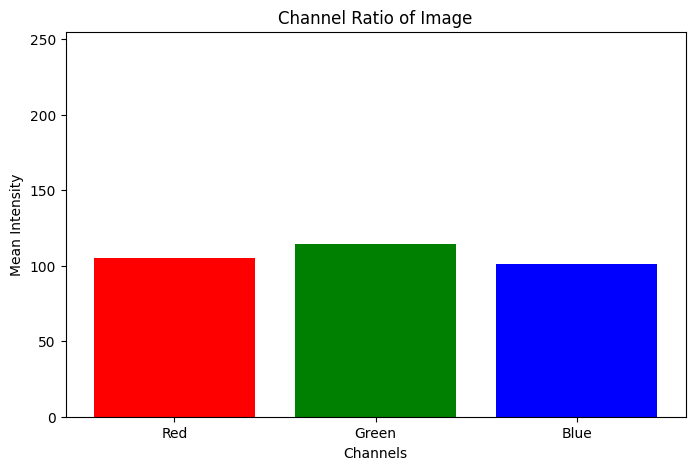

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_channel_ratio(image_path):
    # Open the image using PIL (Python Imaging Library)
    img = Image.open(image_path)
    
    # Convert the image to numpy array
    img_array = np.array(img)
    
    # Calculate channel ratios
    red_ratio = img_array[:,:,0].mean()
    green_ratio = img_array[:,:,1].mean()
    blue_ratio = img_array[:,:,2].mean()
    
    # Plotting the ratios
    channels = ['Red', 'Green', 'Blue']
    ratios = [red_ratio, green_ratio, blue_ratio]
    
    plt.figure(figsize=(8, 5))
    plt.bar(channels, ratios, color=['red', 'green', 'blue'])
    plt.xlabel('Channels')
    plt.ylabel('Mean Intensity')
    plt.title('Channel Ratio of Image')
    plt.ylim(0, 255)  # Adjust ylim if necessary
    plt.show()

# Example usage:
image_path = '../../../Forchheim/D01_Motorola_E3_1/facebook/D01_img_facebook_0001.jpg'  # Replace with your image path
plot_channel_ratio(image_path)


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_color_histograms(image_path):
  """Plots histograms for Red, Green, and Blue channels of an image.

  Args:
    image_path: Path to the image file.
  """

  if not os.path.exists(image_path):
    print(f"Image file not found: {image_path}")
    return

  try:
    img = cv2.imread(image_path)
    if img is None:
      print(f"Failed to load image: {image_path}")
      return

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Split into color channels
    r, g, b = cv2.split(img)

    # Calculate histograms
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

    # Plot histograms
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(hist_r, color='r')
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title('Red Histogram')

    plt.subplot(1, 3, 2)
    plt.plot(hist_g, color='g')
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title('Green Histogram')

    plt.subplot(1, 3, 3)
    plt.plot(hist_b, color='b')
    plt.xlabel('Intensity')
    plt.ylabel('Count')
    plt.title('Blue Histogram')

    plt.tight_layout()
    plt.show()
  except Exception as e:
    print(f"Error processing image: {e}")

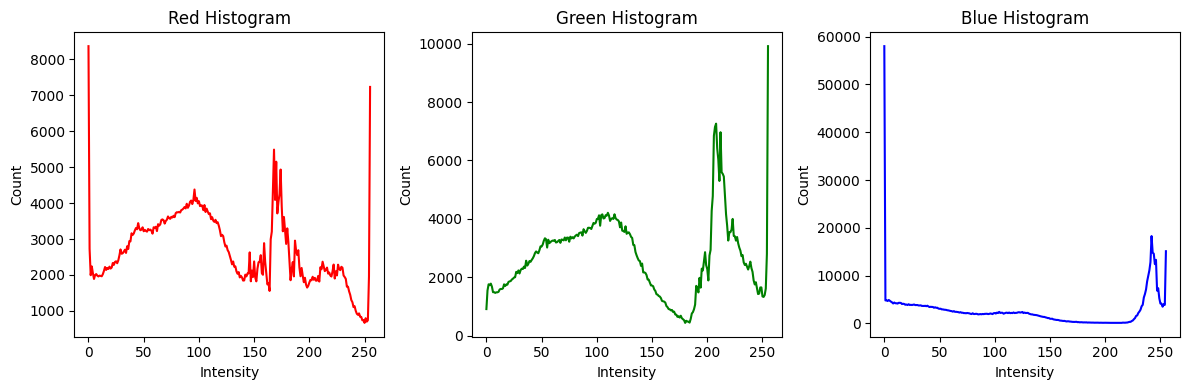

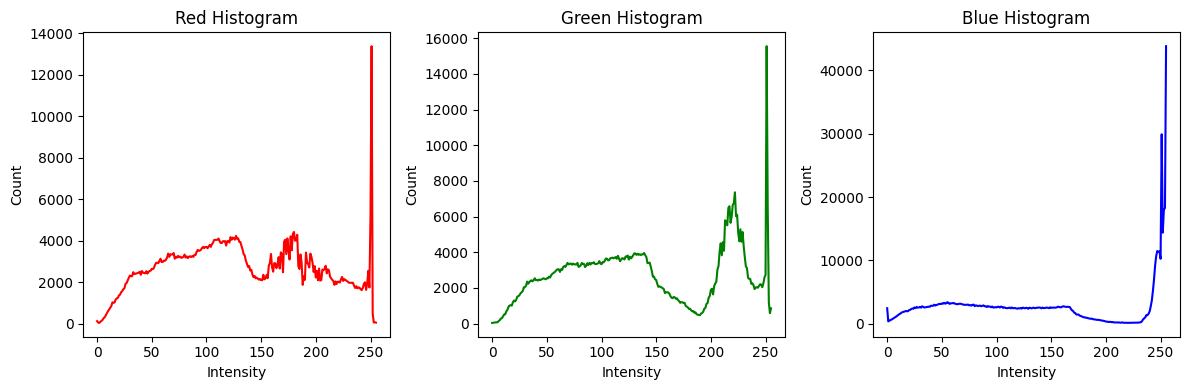

In [22]:
path="../../../Forchheim/D01_Motorola_E3_1/facebook/D01_img_facebook_0003.jpg"
image_path3 = '../../../Forchheim/D02_LG_OptimusL50_1/facebook/D02_img_facebook_0003.jpg'
plot_color_histograms(path)
plot_color_histograms(image_path3)

In [11]:
for image,_ in dataloader:
    plot_color_histograms(image)
    break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [12]:
import torch
import matplotlib.pyplot as plt

def plot_color_ratios(tensor_image):
    """
    Plot color channel ratios (R/G, R/B, G/B) for a tensor image.

    Args:
        tensor_image: PyTorch tensor representing the image. Should have shape (C, H, W)
                      where C is the number of channels (3 for RGB).

    Returns:
        None. Plots the color channel ratios.
    """
    try:
        # Convert tensor to NumPy array and transpose if necessary
        img_np = tensor_image.cpu().numpy()
        if img_np.shape[0] == 3:  # Check if RGB image
            img_np = np.transpose(img_np, (1, 2, 0))  # Convert from (C, H, W) to (H, W, C)

        # Split into color channels
        r = img_np[:, :, 0]
        g = img_np[:, :, 1]
        b = img_np[:, :, 2]

        # Calculate mean intensities for each channel
        mean_r = np.mean(r)
        mean_g = np.mean(g)
        mean_b = np.mean(b)

        # Calculate color ratios
        if mean_g != 0:
            ratio_rg = mean_r / mean_g
        else:
            ratio_rg = float('inf') if mean_r != 0 else 1.0  # handle division by zero

        if mean_b != 0:
            ratio_rb = mean_r / mean_b
            ratio_gb = mean_g / mean_b
        else:
            ratio_rb = float('inf') if mean_r != 0 else 1.0
            ratio_gb = float('inf') if mean_g != 0 else 1.0

        # Plotting
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 3, 1)
        plt.imshow(r, cmap='gray')
        plt.title('Red Channel')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(g, cmap='gray')
        plt.title('Green Channel')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(b, cmap='gray')
        plt.title('Blue Channel')
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Print color ratios
        print(f"Red/Green Ratio: {ratio_rg:.2f}")
        print(f"Red/Blue Ratio: {ratio_rb:.2f}")
        print(f"Green/Blue Ratio: {ratio_gb:.2f}")

    except Exception as e:
        print(f"Error plotting color ratios: {e}")

# Example usage:
# Assuming 'tensor_image' is your tensor image loaded from a dataloader or elsewhere
# Example tensor shape: (3, H, W) for RGB image
# Example usage with a PyTorch DataLoader 'dataloader':
# for tensor_image, _ in dataloader:
#     plot_color_ratios(tensor_image)


In [13]:
for image,_ in dataloader:
    plot_color_ratios(image)
    break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [ ]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)



In [ ]:
def load_images_with_labels(data_dir, batch_size, transform=None):
    if transform is None:
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize((224, 224))
        ])

    dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Create empty lists to store images and labels
    images, labels = [], []

    # Iterate over the dataloader
    for images_batch, labels_batch in dataloader:
        images.extend(images_batch)
        labels.extend(labels_batch)

    return images, labels

In [ ]:
# Testing
if __name__ == "__main__":
    
    data_dir="D:\\Forchheim - Copy"
    X,y=load_images_with_labels(data_dir,batch_size=1)

    

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    clf = SVM()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    print("SVM classification accuracy", accuracy(y_test, predictions))

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()